In [1]:
# ---------------- plotting mineral chemistry data


# --- import modules

import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import gridspec
import matplotlib.ticker as ticker

In [2]:
# --- create dataframe from excel spreadsheet using pandas import command 

df_analysis = pd.read_csv('_DATA/Ore_WDS_apfu.csv', 
                          encoding = "ANSI")

# --- fill with 0.0 data where there are no values 

df_analysis = df_analysis.fillna(0.0)

# --- add relevant sums and ratios to dataframe  

df_analysis['NbTa'] = df_analysis['Nb'] + df_analysis['Ta']
df_analysis['FeMn'] = df_analysis['Fe'] + df_analysis['Mn']
df_analysis['TiSn'] = df_analysis['Ti'] + df_analysis['Sn']
df_analysis['FeTa'] = df_analysis['Fe'] + df_analysis['Ta']
df_analysis['MnNb'] = df_analysis['Mn'] + df_analysis['Nb']
df_analysis['FeNbTa'] = df_analysis['Fe'] + df_analysis['Nb'] + df_analysis['Ta']

df_analysis['Fe/Mn'] = df_analysis['Fe'] / df_analysis['Mn']
df_analysis['Nb/Ta'] = df_analysis['Nb'] / df_analysis['Ta']
df_analysis['Ti/NbTa'] = df_analysis['Ti'] / df_analysis['NbTa']
df_analysis['Ti/FeNbTa'] = df_analysis['Ti'] / df_analysis['FeNbTa']
df_analysis['Ti/Nb'] = df_analysis['Ti'] / df_analysis['Nb']
df_analysis['Ti/Ta'] = df_analysis['Ti'] / df_analysis['Ta']
df_analysis['Ti/Sn'] = df_analysis['Ti'] / df_analysis['Sn']
df_analysis['Ta#'] = df_analysis['Ta'] / df_analysis['NbTa']
df_analysis['Mn#'] = df_analysis['Mn'] / df_analysis['FeMn']

df_analysis['FeMnNb2'] = df_analysis['FeMn'] + (2*df_analysis['Nb'])
df_analysis['FeMnTa2'] = df_analysis['FeMn'] + (2*df_analysis['Ta'])
df_analysis['TiSn3'] = df_analysis['TiSn'] * 3

df_analysis

,Sample,Area,Comment,Context,Mineral,Al,Ta,Ti,Mn,Mg,...,Ti/NbTa,Ti/FeNbTa,Ti/Nb,Ti/Ta,Ti/Sn,Ta#,Mn#,FeMnNb2,FeMnTa2,TiSn3
0,BU19TS(2),Ore1,BU19TS(2)-ore1.1,patchy,rutile,0.004586,0.059936,0.824603,0.000203,0.000000,...,8.117834,4.520213,19.801781,13.757984,184.958848,0.590045,0.002510,0.164336,0.200923,2.487184
1,BU19TS(2),Ore1,BU19TS(2)-ore1.2,core,rutile,0.005079,0.030841,0.853289,0.000076,0.000000,...,10.116425,5.864168,15.947536,27.667463,124.583648,0.365643,0.001248,0.168250,0.122920,2.580414
2,BU19TS(2),Ore1,BU19TS(2)-ore1.3,rim,rutile,0.136536,0.051377,0.732472,0.000887,0.000000,...,7.386743,4.297544,15.329088,14.256753,143.858314,0.518122,0.012297,0.167733,0.174921,2.212691
3,BU19TS(2),Ore1,BU19TS(2)-ore1.4,core,rutile,0.005556,0.026573,0.855449,0.000808,0.000000,...,10.416776,6.152805,15.399881,32.192205,96.432318,0.323581,0.013998,0.168818,0.110866,2.592961
4,BU19TS(2),Ore1,BU19TS(2)-ore1.5,rim,rutile,0.004474,0.042138,0.837046,0.000134,0.000000,...,8.689104,5.229137,15.445121,19.864406,115.537796,0.437421,0.002100,0.172264,0.148151,2.532873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,BU04,Ore2,BU04-Ore2_coltan1,rim,rutile,0.051701,0.095104,0.524222,0.044977,0.000000,...,1.890652,1.344612,2.877703,5.512110,46.416590,0.343000,0.285432,0.521909,0.347782,1.606546
88,BU19TS(1),Ore1,BU19TS(1)-rutile1.3,core,rutile,0.028596,0.055664,0.863925,0.001623,0.000000,...,12.987717,7.643243,79.591271,15.520327,116.564163,0.836820,0.033718,0.069845,0.159464,2.614010
89,BU19TS(1),Ore1,BU19TS(1)-rutile1.4,core,rutile,0.018926,0.048892,0.875627,0.001681,0.001021,...,13.990902,8.023885,63.947262,17.909229,119.544429,0.781212,0.034855,0.075609,0.146008,2.648854
90,BU19TS(1),Ore2,Rut2.1,core,rutile,0.004201,0.024823,0.916692,0.000008,0.000000,...,24.252325,12.631577,70.650532,36.929007,59.069659,0.656728,0.000239,0.060732,0.084428,2.796632


In [4]:
# --- print the colums of the imported dataframe for later use if required

df_analysis.columns


Index(['Sample', 'Area', 'Comment', 'Context', 'Mineral', 'Al', 'Ta', 'Ti',
       'Mn', 'Mg', 'Fe', 'Sn', 'Ca', 'Nb', 'sum', 'NbTa', 'FeMn', 'TiSn',
       'FeTa', 'MnNb', 'FeNbTa', 'Fe/Mn', 'Nb/Ta', 'Ti/NbTa', 'Ti/FeNbTa',
       'Ti/Nb', 'Ti/Ta', 'Ti/Sn', 'Ta#', 'Mn#', 'FeMnNb2', 'FeMnTa2'],
      dtype='object')

In [3]:
# --- filter the dataframe to specific conditions

df_query = df_analysis.query('Sample == "BU04"').query('Area=="Ore1"')
#df_query = df_analysis.query('Mineral == "coltan"')

df_query


,Sample,Area,Comment,Context,Mineral,Al,Ta,Ti,Mn,Mg,...,Ti/NbTa,Ti/FeNbTa,Ti/Nb,Ti/Ta,Ti/Sn,Ta#,Mn#,FeMnNb2,FeMnTa2,TiSn3
42,BU04,Ore1,BU04-Ore1.2,patchy,coltan,0.036266,0.114460,0.037710,0.577711,0.0,...,0.019343,0.016018,0.020550,0.329461,17.515642,0.058712,0.588072,4.652496,1.211301,0.119589
43,BU04,Ore1,BU04-Ore1.3,rim,coltan,0.002433,0.498909,0.060786,0.429194,0.0,...,0.031029,0.024526,0.041631,0.121837,4.541668,0.254675,0.452428,3.868836,1.946465,0.222509
44,BU04,Ore1,BU04-Ore1.4,rim,coltan,0.001376,0.436013,0.070937,0.525090,0.0,...,0.036436,0.029768,0.046951,0.162695,5.404760,0.223953,0.546292,3.982949,1.833216,0.252187
45,BU04,Ore1,BU04-Ore1.5,core,coltan,0.004017,0.317033,0.071461,0.500646,0.0,...,0.036792,0.029674,0.043969,0.225407,6.001381,0.163225,0.517981,4.217068,1.600600,0.250107
46,BU04,Ore1,BU04-Ore1.6,core,coltan,0.003331,0.279643,0.089239,0.498780,0.0,...,0.046456,0.037025,0.054371,0.319120,7.251686,0.145576,0.504785,4.270706,1.547388,0.304636
47,BU04,Ore1,BU04-Ore1.7,core,coltan,0.000724,0.293060,0.092193,0.473174,0.0,...,0.047785,0.038077,0.056344,0.314586,7.071631,0.151899,0.490284,4.237613,1.551222,0.315689
48,BU04,Ore1,BU04-Ore1.8,patchy,coltan,0.000721,0.310927,0.055666,0.530645,0.0,...,0.028452,0.023189,0.033828,0.179031,5.159588,0.158923,0.544448,4.265731,1.596501,0.199363
49,BU04,Ore1,BU04-Ore1.9,rim,coltan,0.002045,0.328565,0.094596,0.502133,0.0,...,0.049273,0.039684,0.059447,0.287907,4.801065,0.171143,0.519791,4.148555,1.623158,0.342897
50,BU04,Ore1,BU04-Ore1.10,patchy,coltan,0.000000,0.358935,0.031547,0.546470,0.0,...,0.015963,0.013074,0.019505,0.087890,5.319665,0.181623,0.555840,4.217798,1.701014,0.112430


In [8]:
# --- plot binary scatter graphs

fig = px.scatter(df_query, x="Mn#", y="Ti",symbol="Context", color="Sample", hover_data=["Comment"],
                width=900, height=600)
#                  size="Ti",text=df_analysis["Comment"].str.slice(start=-4))


fig.update_layout(plot_bgcolor="white")
fig.update_traces(textposition='top center')

# fig.update_traces(marker=dict(size=10))

fig.update_layout(font=dict(family="Arial",size=16,color="black")) 

fig.update_xaxes(ticks='inside',zeroline=True,linecolor="black",showgrid=False)#,range=(0,1))
fig.update_yaxes(ticks='inside',zeroline=True,linecolor="black",showgrid=False)#,range=(0,1))

#fig.write_image("Ore_coltan_Ta#-Mn#.pdf");
fig.show()

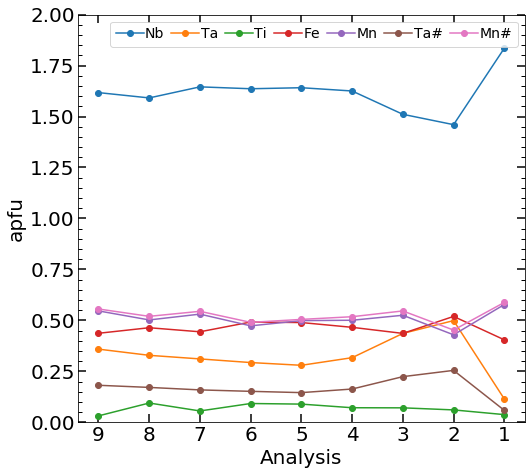

In [6]:
# --- plot binary line graphs

fig, ax = plt.subplots(figsize=(8,7.5))

    # - plot the raw spectrum line (measured data) and the modelled spectrum (after peak fitting)

plt.plot(df_query["Comment"],df_query["Nb"],'-o', label='Nb')
plt.plot(df_query["Comment"],df_query["Ta"],'-o', label='Ta')
plt.plot(df_query["Comment"],df_query["Ti"],'-o', label='Ti')
plt.plot(df_query["Comment"],df_query["Fe"],'-o', label='Fe')
plt.plot(df_query["Comment"],df_query["Mn"],'-o', label='Mn')
plt.plot(df_query["Comment"],df_query["Ta#"],'-o', label='Ta#')
plt.plot(df_query["Comment"],df_query["Mn#"],'-o', label='Mn#')



    # --- adjust plot parameters

plt.legend(loc='best', fontsize=14, ncol=9, handletextpad=0.1, columnspacing = 0.5)  
    
plt.xlabel("Analysis",fontsize=20)
#plt.xlim([start,end])
plt.ylabel("apfu",fontsize=20)
plt.ylim([0,2])

ax.invert_xaxis()

# ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))

ax.set_xticklabels(['1', '2','3', '4', '5', '6', '7', '8', '9'])

ax.tick_params(axis='both', which='major',labelsize=20,direction='in',width=1.5,length=8,right=True, top=True)
ax.tick_params(axis='both', which='minor',direction='in',width=1,length=4,right=True)

#plt.title(df_spectrum_peaks.iloc[0]["file"],horizontalalignment='center',fontsize=22)

        
plt.savefig('C:/Users/u0125722/Documents/Python_Scripts/output/figures/coltan-BU04-Ore1.pdf')
plt.show()

In [3]:
# --- normalization function - written by Bram Paredis

def normalize(data, total=None):
    """Normalize data to 100%"""
    if total is None:
        total = data.sum(axis=1)
    return data.divide(total, axis=0) * 100

In [4]:
# --- define subset within dataset for ternary normalization
A = "TiSn"
B = "Nb" 
C = "Ta"

df_subset = df_analysis.loc[:, [A, B, C]]


# --- normalize subset using function defined above

df_subset_normalized = normalize(df_subset)


# --- combine calculated data with metadata

df_subset_normalized['sample'] = df_analysis['Sample']
df_subset_normalized['point'] = df_analysis['Comment']
df_subset_normalized['area'] = df_analysis['Area']
df_subset_normalized['mineral'] = df_analysis['Mineral']
df_subset_normalized['Context'] = df_analysis['Context']

df_subset_normalized

,TiSn,Nb,Ta,sample,point,area,mineral,Context
0,89.085023,4.474646,6.440330,BU19TS(2),BU19TS(2)-ore1.1,Ore1,rutile,patchy
1,91.069536,5.665099,3.265365,BU19TS(2),BU19TS(2)-ore1.2,Ore1,rutile,core
2,88.148978,5.710742,6.140280,BU19TS(2),BU19TS(2)-ore1.3,Ore1,rutile,rim
3,91.323058,5.869251,2.807691,BU19TS(2),BU19TS(2)-ore1.4,Ore1,rutile,core
4,89.758621,5.761587,4.479792,BU19TS(2),BU19TS(2)-ore1.5,Ore1,rutile,rim
...,...,...,...,...,...,...,...,...
87,65.886422,22.412632,11.700946,BU04,BU04-Ore2_coltan1,Ore2,rutile,rim
88,92.907368,1.157377,5.935255,BU19TS(1),BU19TS(1)-rutile1.3,Ore1,rutile,core
89,93.380963,1.448167,5.170870,BU19TS(1),BU19TS(1)-rutile1.4,Ore1,rutile,core
90,96.103324,1.337619,2.559058,BU19TS(1),Rut2.1,Ore2,rutile,core


In [6]:
# --- ternary plot of normalized subset

fig2 = px.scatter_ternary(df_subset_normalized, a=A, b=B, c=C,
                          color="sample",hover_data=['area','point'],symbol="Context")#,range_color=[1,5],color_continuous_scale='Inferno'))

fig2.update_traces(marker=dict(size=8),
                  selector=dict(mode='markers'))

fig2.update_ternaries(bgcolor="white")

fig2.update_ternaries(aaxis_linecolor='black',aaxis_tickcolor='black',aaxis_ticks='inside',aaxis_showgrid=False,
                      baxis_linecolor='black',baxis_tickcolor='black',baxis_ticks='inside',baxis_showgrid=False,
                      caxis_linecolor='black',caxis_tickcolor='black',caxis_ticks='inside',caxis_showgrid=False)

#fig2.update_ternaries(aaxis_min=0,baxis_min=0.5,caxis_min=0)
#fig2.update_ternaries(aaxis_min=0.55,baxis_min=0,caxis_min=0.25)

fig2.write_image("Ore_ternary_TiSn-Nb-Ta.pdf")
fig2.show()

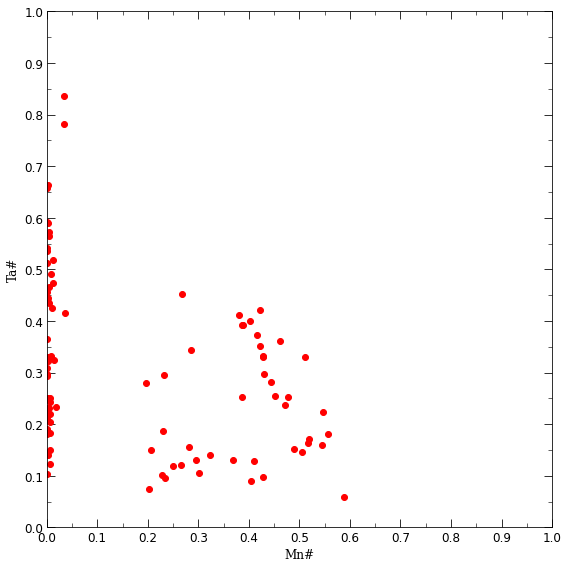

In [22]:
fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(df_analysis['Mn#'], df_analysis['Ta#'],'ro')


ax1.set_xlim(0,1)
ax1.set_ylim(0,1)

ax1.set_xlabel("Mn#",family="serif",  fontsize=12)
ax1.set_ylabel("Ta#",family="serif",  fontsize=12)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.1))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="in", top=True, right=True, bottom=True, length=8, labelsize=12)
ax1.tick_params(axis='both',which='minor', direction="in", top=True, right=True, bottom=True, length=4, labelsize=12)

fig.tight_layout()

In [ ]:
# --- separate data from metadata - only do calculation in data afterwards

df_data = df_analysis.drop(['Sample', 'Area', 'Analysis', 'Mineral','Total'], 
                             axis=1)

#df_apfu = df_analysis.drop(['Sample', 'Analysis', 'Point', 'mineral','Al2O3', 'SrO', 'SiO2', 'Cl',
       #'K2O', 'TiO2', 'Na2O', 'F', 'MgO', 'FeO', 'MnO', 'P2O5', 'CaO', 'BaO',
       #'Total','?cations', '?cations+Li', 'Cl.1', 'F.1', 'OH', '?X'], axis=1)

#df_analysis_metadata = df_analysis.drop(['SiO2', 'TiO2', 'Al2O3', 'Cr2O3',
       #'FeO', 'MnO', 'MgO', 'CaO', 'ZnO', 'BaO', 'Na2O', 'K2O', 'F', 'Cl',
       #'Li2O', 'H2O', 'Si', 'Al4', 'Ti', 'Al6', 'Cr', 'Fe', 'Mn', 'Mg', 'Li',
       #'Zn', 'Ca', 'Na', 'K', 'Ba', 'F.1', 'Cl.1', 'OH', 'Mg/(Mg+Fe)', 'XF',
       #'Li7', 'Mg24', 'P31', 'Ca44', 'Sc45', 'Ti46', 'Ti49', 'V51', 'Cr52',
       #'Mn55', 'Co59', 'Sr88', 'Y89', 'Zr91', 'Nb93', 'Sn118', 'Ba137',
       #'La139', 'Ce140', 'Pr141', 'Nd143', 'Sm147', 'Gd157', 'Tb159', 'Dy161',
       #'Ho165', 'Er166', 'Tm169', 'Yb173', 'Lu175', 'Hf178', 'Ta181', 'W182',
       #'Pb206', 'Pb207', 'Pb208', 'Th232', 'U238'], axis=1).drop(48,axis=0)
df_data

In [ ]:
# --- replace values starting with "<" (i.e. below detection limit) to 0.0001

#df_data_bdl = df_data.replace('NaN',0.0)

df_data_bdl = df_analysis.fillna(0.0)
# --- change data type from string to float for calculations

#df_data_bdl = df_data_bdl.astype(float)

df_data_bdl

In [ ]:
# --- add columns in the dataframe using iloc characters

df_apfu["M3"] = df_Al_data['Fe2O3'] + df_Al_data['Al2O3']
df_apfu["M2"] = df_Al_data['MnO'] + df_Al_data['FeO'] + df_Al_data['MgO'] + df_Al_data['CaO']
df_apfu["A"] = df_Al_data['Li2O'] + df_Al_data['Na2O']


#df_apfu["X"] = df_Al_data['H2O.1'] + df_Al_data['F']
#df_analysis_bdl["Th/U"] = df_analysis_bdl['Th232']/ df_analysis_bdl['U238']
#df_analysis_bdl["REE"] = df_analysis_bdl.iloc[:, 52:65].sum(axis=1)
#df_analysis_bdl["Mg-Li"] = df_analysis_bdl['Mg']-df_analysis_bdl['Li']

In [ ]:
# --- combine calculated data with metadata

df_data_bdl['sample'] = df_analysis['Sample']
df_data_bdl['point'] = df_analysis['Analysis']
df_data_bdl['mineral'] = df_analysis['mineral']
df_data_bdl

In [ ]:
# --- filter dataframe for only selected entries, e.g. only phases containing Al

df_filter = df_analysis.query('F!= 0')
df_filter